## **Spinal Risk Score Calculations**

We want to calculate an aggregate risk score using survey responses to specific risk questions. We can start by importing the necessary modules to perform this task.

In [1]:
#imports
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#Import the dataset -- change csv file path as needed
pat_res = pd.read_csv("../data/RiskFinal_DATA_2024-02-05_0017_combined.csv")

After importing the full data, we can display the dataframe to get a better idea of what the data looks like. 

In [3]:
pd.set_option('display.max_columns', None)
pat_res

,record_id,risk_1_timestamp,age,sex,height,weight,zipcode,ethnicity,income,education,prior_surg,spin_surg,succ_surg,religion,odi_1,odi_2,odi_3,odi_4,odi_5,odi_6,odi_7,odi_8,odi_9,odi_10,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,att_check_1,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,exer_50pain_50death,exer_90pain_1death,exer_90pain_10death,exer_90pain_50death,work_50improv_1drop,work_50improv_10drop,work_50improv_50drop,work_50improv_90drop,work_90improv_1drop,work_90improv_10drop,work_90improv_50drop,work_50improv_1para,work_50improv_10para,work_50improv_50para,work_50improv_90para,work_90improv_1para,work_90improv_10para,att_check2,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death,dospert1,dospert2,dospert3,dospert4,dospert5,dospert6,dospert7,dospert8,dospert9,dospert10,dospert11,dospert12,dospert13,dospert14,dospert15,dospert16,dospert17,dospert18,dospert19,dospert20,dospert21,dospert22,dospert23,dospert24,dospert25,dospert26,dospert27,dospert28,dospert29,dospert30,att_pass,odi_final,bmi,risk_1_complete
0,3,1/26/2024 22:04,25,1,18,36,76177,4,4,6,1,0.0,1.0,1,1,1,1,1,1,2,1,1,1,1,4,4,3,0,5,5,5,4,4,4,1,0,5,4,0,5,5,4,4,5,5,4,4,3,0,0,5,5,5,0,5,3,0,5,5,0,7,7,1,7,3,2,6,1,4,1,6,5,6,1,5,1,1,6,7,1,6,5,5,7,1,6,7,6,1,5,1,0.5,20.798817,2
1,6,1/26/2024 22:04,28,1,25,77,32226,4,13,6,1,0.0,1.0,1,1,1,1,1,2,2,1,1,1,1,4,4,3,2,5,5,4,3,3,3,2,1,5,3,0,5,5,5,4,5,5,5,4,3,1,0,5,3,5,2,4,2,1,5,3,1,7,3,1,6,2,1,7,1,1,3,5,5,4,1,6,5,1,3,6,6,6,7,1,1,6,7,7,5,1,6,1,1.0,22.511188,2
2,22,1/26/2024 22:04,20,2,16,25,28729,4,11,6,1,0.0,1.0,10,1,1,1,1,1,1,1,1,1,1,3,2,0,0,5,4,3,0,0,0,0,0,0,0,0,4,4,2,1,5,4,1,1,0,0,0,2,1,5,0,1,0,0,1,0,0,7,1,1,1,2,2,3,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,1,1,1,1,7,3,2,1,1,0.0,20.191988,2
3,4,1/26/2024 22:04,31,1,23,131,94041,5,6,7,1,0.0,1.0,2,6,1,1,1,1,1,1,1,1,1,3,2,1,0,5,5,4,2,0,1,0,0,4,1,0,3,3,1,0,5,4,2,1,0,0,0,4,3,5,0,3,0,0,3,2,0,7,6,1,5,2,1,2,1,1,1,1,1,1,1,1,1,5,1,1,1,3,5,1,1,4,5,5,3,1,3,1,2.5,31.563265,2
4,21,1/26/2024 22:04,25,1,26,106,50010,2,4,7,1,0.0,1.0,10,1,1,1,1,1,1,1,2,1,1,5,4,1,0,5,5,5,3,0,5,4,1,5,4,1,5,4,1,0,5,5,1,5,4,1,0,5,4,5,1,5,4,1,5,4,1,6,3,1,1,6,2,5,1,2,2,1,1,5,1,5,1,5,1,5,1,6,3,6,2,1,5,6,5,3,1,1,0.5,25.724339,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,755,2/1/2024 22:40,20,1,25,86,34744,5,1,6,1,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,2,1,0,0,5,4,3,1,0,0,0,0,0,0,0,4,2,1,0,4,3,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0,6,5,2,6,5,1,5,1,1,1,1,1,2,1,2,3,1,1,1,1,5,2,1,1,1,2,3,5,1,2,1,0.0,23.731674,2
798,753,2/1/2024 22:42,28,2,19,88,55428,5,1,6,0,NaN,NaN,2,4,1,1,1,1,1,1,1,1,1,2,1,0,0,5,4,3,2,1,3,2,1,4,3,1,3,3,1,0,5,4,2,2,1,0,0,5,3,5,2,3,2,0,4,3,0,6,2,1,5,5,3,5,1,1,1,5,4,5,3,5,5,1,5,1,5,6,5,5,3,1,5,6,6,5,3,1,1.5,28.565427,2
799,754,2/1/2024 22:45,44,1,26,101,76708,2,4,5,0,NaN,NaN,1,4,1,2,1,1,1,1,1,1,2,1,1,1,0,5,3,2,1,1,0,0,0,2,1,0,3,2,1,0,3,2,1,1,0,0,0,1,1,5,0,1,0,0,1,0,0,7,5,1,1,6,1,3,1,1,1,1,1,1,1,3,2,2,1,1,2,2,1,4,1,1,3,5,5,2,2,1,2.5,25.064740,2
800,756,2/1/2024 22:51,68,2,19,96,94597,1,12,8,1,0.0,1.0,10,4,1,1,1,1,1,1,1,1,1,4,4,0,0,5,5,5,3,0,4,0,0,4,1,0,4,4,0,0,5,5,3,3,0,0,0,5,3,5,0,3,0,0,4,1,0,7,5,1,7,1,1,5,1,1,1,1,5,2,1,1,1,1,6,1,1,7,5,1,1,1,1,6,7,1,1,1,1.5,29.856520,2


We then extract only the necessary columns that are relevant to spinal risk score calculation.

In [4]:
pat_res_risk = pat_res[['exer_50improv_1drop', 'exer_50improv_10drop', 'exer_50improv_50drop',
       'exer_50improv_90drop', 'att_check_1', 'exer_90improv_1drop',
       'exer_90improv_10drop', 'exer_90improv_50drop', 'exer_90improv_90drop',
       'exer_50pain_1death', 'exer_50pain_10death', 'exer_50pain_50death',
       'exer_90pain_1death', 'exer_90pain_10death', 'exer_90pain_50death',
       'work_50improv_1drop', 'work_50improv_10drop', 'work_50improv_50drop',
       'work_50improv_90drop', 'work_90improv_1drop', 'work_90improv_10drop',
       'work_90improv_50drop', 'work_50improv_1para', 'work_50improv_10para',
       'work_50improv_50para', 'work_50improv_90para', 'work_90improv_1para',
       'work_90improv_10para', 'att_check2', 'work_90improv_50para',
       'work_50improv_1death', 'work_50improv_10death',
       'work_50improv_50death', 'work_90improv_1death',
       'work_90improv_10death', 'work_90improv_50death']]


Here we ensure that we have pulled all the correct columns.

In [5]:
pat_res_risk

,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,att_check_1,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,exer_50pain_50death,exer_90pain_1death,exer_90pain_10death,exer_90pain_50death,work_50improv_1drop,work_50improv_10drop,work_50improv_50drop,work_50improv_90drop,work_90improv_1drop,work_90improv_10drop,work_90improv_50drop,work_50improv_1para,work_50improv_10para,work_50improv_50para,work_50improv_90para,work_90improv_1para,work_90improv_10para,att_check2,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death
0,4,4,3,0,5,5,5,4,4,4,1,0,5,4,0,5,5,4,4,5,5,4,4,3,0,0,5,5,5,0,5,3,0,5,5,0
1,4,4,3,2,5,5,4,3,3,3,2,1,5,3,0,5,5,5,4,5,5,5,4,3,1,0,5,3,5,2,4,2,1,5,3,1
2,3,2,0,0,5,4,3,0,0,0,0,0,0,0,0,4,4,2,1,5,4,1,1,0,0,0,2,1,5,0,1,0,0,1,0,0
3,3,2,1,0,5,5,4,2,0,1,0,0,4,1,0,3,3,1,0,5,4,2,1,0,0,0,4,3,5,0,3,0,0,3,2,0
4,5,4,1,0,5,5,5,3,0,5,4,1,5,4,1,5,4,1,0,5,5,1,5,4,1,0,5,4,5,1,5,4,1,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,2,1,0,0,5,4,3,1,0,0,0,0,0,0,0,4,2,1,0,4,3,1,0,0,0,0,0,0,5,0,0,0,0,0,0,0
798,2,1,0,0,5,4,3,2,1,3,2,1,4,3,1,3,3,1,0,5,4,2,2,1,0,0,5,3,5,2,3,2,0,4,3,0
799,1,1,1,0,5,3,2,1,1,0,0,0,2,1,0,3,2,1,0,3,2,1,1,0,0,0,1,1,5,0,1,0,0,1,0,0
800,4,4,0,0,5,5,5,3,0,4,0,0,4,1,0,4,4,0,0,5,5,3,3,0,0,0,5,3,5,0,3,0,0,4,1,0


Additionally, we can drop the attention check questions as they are not relevant to risk score calculation.

In [6]:
pat_res_risk = pat_res_risk.drop(['att_check_1','att_check2'], axis=1)

We also need to develop a method to calculate multipliers for different types of complications (foot drop, paralysis, death). We can do this by finding the distribution of responses for each question and building a "risk ratio" using the responses relative to each other when holding all other variables constant. The following code iterates through all the different questions and stores the value counts in a dictionary, which is then printed to be used in a calculation for the different risk multipliers. The analysis for risk multipliers can be found in the "Spinal Risk Score Refinement" Notion page.

In [7]:
counts_by_question = {}

for col in pat_res_risk.columns: 
    counts = pat_res_risk[col].value_counts()
    counts_by_question[col] = counts

for question, counts in counts_by_question.items():
    print(f"Question: {question}")
    print(counts)
    print()

Question: exer_50improv_1drop
exer_50improv_1drop
3    197
1    156
2    143
4    138
0    133
5     35
Name: count, dtype: int64

Question: exer_50improv_10drop
exer_50improv_10drop
1    216
0    198
2    170
3    148
4     60
5     10
Name: count, dtype: int64

Question: exer_50improv_50drop
exer_50improv_50drop
0    427
1    221
2    101
3     43
4      8
5      2
Name: count, dtype: int64

Question: exer_50improv_90drop
exer_50improv_90drop
0    634
1    115
2     28
3     11
4      9
5      5
Name: count, dtype: int64

Question: exer_90improv_1drop
exer_90improv_1drop
4    280
5    258
3    130
0     59
1     40
2     35
Name: count, dtype: int64

Question: exer_90improv_10drop
exer_90improv_10drop
3    239
4    237
0    101
2     93
1     70
5     62
Name: count, dtype: int64

Question: exer_90improv_50drop
exer_90improv_50drop
0    232
1    220
2    197
3    124
4     22
5      7
Name: count, dtype: int64

Question: exer_90improv_90drop
exer_90improv_90drop
0    529
1    170
2  

After the risk score calculation is fully complete, we can begin iterating through each question and calculating aggregate spinal risk for each respondent. The following code finds the complication, percentage of complication, and percentage of improvement.

In [8]:

spinal_risk_list = []
split_names = pat_res_risk.columns[0].split("_")
improv_list = []
comp_list = []
comp_type = []
improv_type = []

# Getting the matrix of all possible question options
comp_weights = {'drop': 1.112, 'para': 2.304*1.112, 'death': 2.534*1.112}
improv_weights = {'exer': 1, 'work': 1.252}

for col in pat_res_risk.columns:
    split_names = col.split("_")
    match_improv = re.search(r'^(\d+)', split_names[1])
    match_comp = re.search(r'^(\d+)(\w+)', split_names[2])
    improv_list.append(float(match_improv.group(1)))
    comp_list.append(float(match_comp.group(1)))
    if split_names[0] == 'exer':
        improv_type.append(improv_weights['exer'])
    elif split_names[0] == 'work':
        improv_type.append(improv_weights['work'])
    if match_comp.group(2) == 'drop':
        comp_type.append(comp_weights['drop'])
    elif match_comp.group(2) == 'para':
        comp_type.append(comp_weights['para'])
    else:
        comp_type.append(comp_weights['death'])


Here we calculate the final risk score and append it to a final risk list that corresponds in order to all the respondents. 

In [9]:
for index, row in pat_res_risk.iterrows():
    spinal_risk_sum = 0 
    for i in range(len(pat_res_risk.columns)):
        option = 6-row[i]
        col_risk = (comp_type[i] * comp_list[i]  - improv_type[i] * improv_list[i]) / option
        spinal_risk_sum += col_risk
    spinal_risk_list.append(spinal_risk_sum)

    

The next goal is to determine the min and max risk score so that we can scale the final risk score to be between 0 and 1

In [10]:
all_combinations = {'comp_type':[], 'comp_level':[], 'improv_type':[], 'improv_level':[]}
for col in pat_res_risk.columns:
    split_names = col.split("_")
    match_improv = re.search(r'^(\d+)', split_names[1])
    match_comp = re.search(r'^(\d+)(\w+)', split_names[2])
    
    all_combinations['comp_level'].append(match_comp.group(1))
    all_combinations['comp_type'].append(match_comp.group(2))

    all_combinations['improv_level'].append(match_improv.group(1))
    all_combinations['improv_type'].append(split_names[0])
all_combos_df = pd.DataFrame(all_combinations)
    


In [13]:
# risk_score = (comp_type_weight*comp_value - improv_type_weight*improv_value)/option)
all_combos_df['comp_type_weight'] = \
    np.where(all_combos_df['comp_type'] == 'drop', comp_weights['drop'], 
         np.where(all_combos_df['comp_type'] =='para', comp_weights['para'], 
                  np.where(all_combos_df['comp_type'] == 'death', comp_weights['death'], np.nan)))

all_combos_df['improv_type_weight'] = \
    np.where(all_combos_df['improv_type'] == 'exer', improv_weights['exer'], 
         np.where(all_combos_df['improv_type'] =='work', improv_weights['work'], np.nan))

all_combos_df.head()

,comp_type,comp_level,improv_type,improv_level,comp_type_weight,improv_type_weight
0,drop,1,exer,50,1.112,1.0
1,drop,10,exer,50,1.112,1.0
2,drop,50,exer,50,1.112,1.0
3,drop,90,exer,50,1.112,1.0
4,drop,1,exer,90,1.112,1.0


In [14]:
np.isclose(comp_type, all_combos_df['comp_type_weight'])
np.isclose(improv_type, all_combos_df['improv_type_weight'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [29]:
df = all_combos_df.copy()
df['comp_level'] = df['comp_level'].astype(float)
df['improv_level'] = df['improv_level'].astype(float)
df['multiplier'] = (df['comp_type_weight'] * df['comp_level']) - (df['improv_type_weight'] * df['improv_level'])

# Computing the min and max possible values for that question
df['min_option_result'] = np.where(df['multiplier'] < 0, df['multiplier'] / 1, df['multiplier'] / 6)
df['max_option_result'] = np.where(df['multiplier'] < 0, df['multiplier'] / 6, df['multiplier'] / 1)

# Computing the overall max and min risk scores
risk_max, risk_min = df[['min_option_result', 'max_option_result']].sum(axis=0).values
print(risk_min)
print(risk_max)

353.61682133333335
-1380.8116053333333


Scaling the new risk score

In [30]:
# Performing min-max scaling
spinal_risk_scores = np.array(spinal_risk_list)
spinal_risk_scores_scaled = (spinal_risk_scores - risk_min) / (risk_max - risk_min)

In [31]:
pat_res_risk.shape

(802, 34)

In [32]:
pat_res_risk[spinal_risk_scores < -1200]

,exer_50improv_1drop,exer_50improv_10drop,exer_50improv_50drop,exer_50improv_90drop,exer_90improv_1drop,exer_90improv_10drop,exer_90improv_50drop,exer_90improv_90drop,exer_50pain_1death,exer_50pain_10death,exer_50pain_50death,exer_90pain_1death,exer_90pain_10death,exer_90pain_50death,work_50improv_1drop,work_50improv_10drop,work_50improv_50drop,work_50improv_90drop,work_90improv_1drop,work_90improv_10drop,work_90improv_50drop,work_50improv_1para,work_50improv_10para,work_50improv_50para,work_50improv_90para,work_90improv_1para,work_90improv_10para,work_90improv_50para,work_50improv_1death,work_50improv_10death,work_50improv_50death,work_90improv_1death,work_90improv_10death,work_90improv_50death
36,5,5,0,0,5,5,0,0,5,5,0,0,5,0,5,5,0,0,5,5,0,5,5,0,0,5,5,0,5,5,0,5,5,0


In [33]:
improv_weights

{'exer': 1, 'work': 1.252}

In [34]:
comp_weights

{'drop': 1.112, 'para': 2.562048, 'death': 2.817808}

In [35]:
1.112 * 1 - 1 * 50

-48.888

In [39]:
for index, row in pat_res_risk.iterrows():
    spinal_risk_sum = 0 
    if index == 36:
        for i in range(len(pat_res_risk.columns)):
            option = 6-row[i]
            col_risk = (comp_type[i] * comp_list[i]  - improv_type[i] * improv_list[i]) / option
            spinal_risk_sum += col_risk

(array([145., 190., 167., 129.,  59.,  53.,  38.,  12.,   7.,   2.]),
 array([0.27368049, 0.33739201, 0.40110353, 0.46481505, 0.52852657,
        0.59223809, 0.65594961, 0.71966113, 0.78337265, 0.84708417,
        0.91079569]),
 <BarContainer object of 10 artists>)

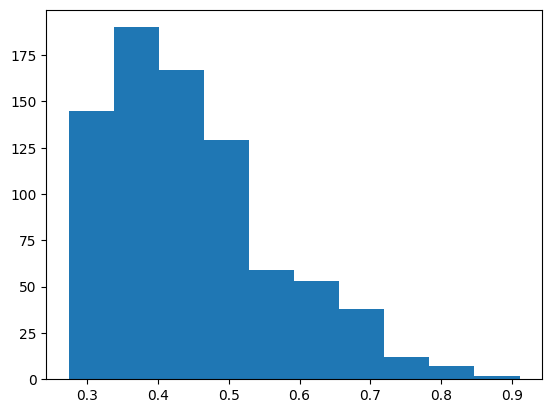

In [40]:
plt.hist(spinal_risk_scores_scaled)

Found this issue. With our current risk score equation, there are two questions where the option that the people select has no impact on their overall risk score.

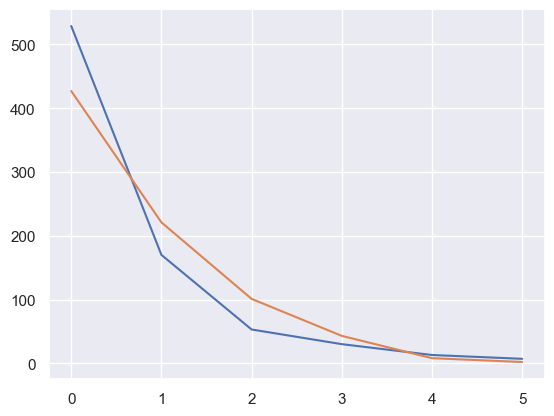

In [137]:
vals90 = np.array([529, 170, 53, 30, 13, 7])
vals50 = np.array([427, 221, 101, 43, 8, 2])
indexes = np.array([x for x in range(1, 7)])
plt.plot(vals90)
plt.plot(vals50)

In [142]:
def weighted_median(data, weights):
    # Sort data and corresponding weights
    sorted_indices = np.argsort(data)
    sorted_data = data[sorted_indices]
    sorted_weights = weights[sorted_indices]

    # Compute cumulative sum of weights
    cumulative_weights = np.cumsum(sorted_weights)
    
    # Find index where cumulative sum crosses half of the total weight
    half_total_weight = np.sum(weights) / 2
    median_index = np.argmax(cumulative_weights >= half_total_weight)

    # Return corresponding value from sorted data
    return sorted_data[median_index]

In [143]:
print(weighted_median(vals50, indexes))
print(weighted_median(vals90, indexes))

print(weighted_median(vals50, indexes) / weighted_median(vals90, indexes))

8
13
0.6153846153846154


In [138]:
print(np.mean(vals50 * indexes))
print(np.mean(vals90 * indexes))
np.mean(vals50 * indexes) / np.mean(vals90 * indexes)


232.66666666666666
209.16666666666666


1.1123505976095618

In [139]:
df[df['multiplier'] == 0]

,comp_type,comp_level,improv_type,improv_level,comp_type_weight,improv_type_weight,multiplier,min_option_result,max_option_result


I want to run some simulations to try and see what the distribution of possible risk scores looks like

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

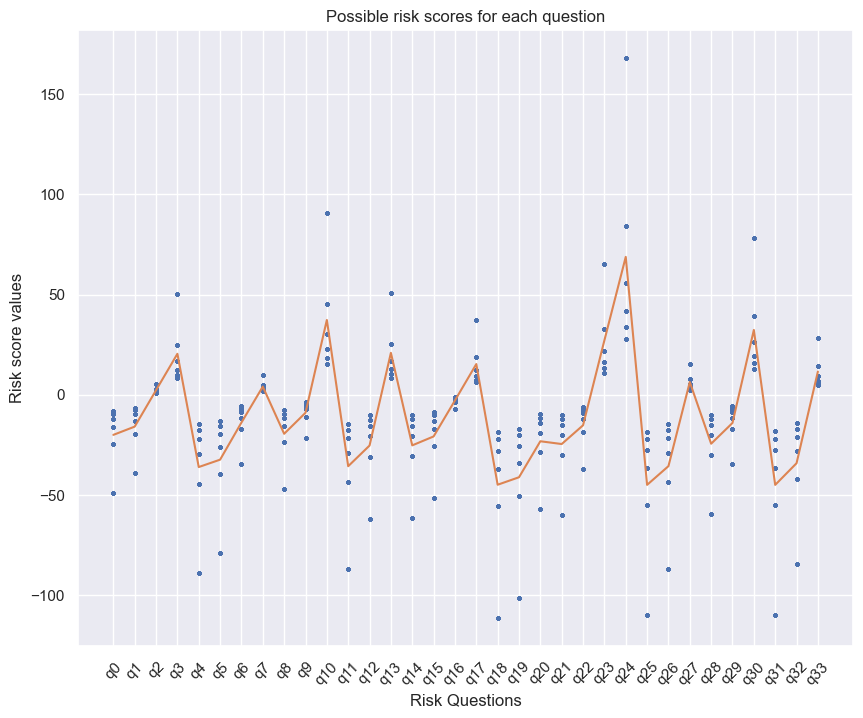

In [183]:
num_simulations = 10000

# Get weights and random responses
weights = df['multiplier'].to_numpy().reshape((34, 1))
rand_responses = 1 / np.random.randint(1, 7, (34, num_simulations))
########
# Replacing not at all with 0
# rand_responses[rand_responses == 1/6] = 0
#######

# Get risk scores for each question
risk_scores = weights * rand_responses

# Final risk scores summed
risk_scores_summed = risk_scores.sum(axis=0)

sims = pd.DataFrame(risk_scores, columns=['s' + str(x) for x in range(risk_scores.shape[1])])
sims = sims.reset_index()
sims_melt = sims.melt(id_vars='index')
mean_vals = sims.iloc[:, 1:].mean(axis=1)

# Plot ranges for each question
plt.figure(figsize=(10, 8))
plt.plot(sims_melt['index'], sims_melt['value'], marker='o', linestyle='None', markersize=2.0)
plt.plot(sims['index'], mean_vals)
plt.xlabel("Risk Questions")
plt.ylabel("Risk score values")
plt.title("Possible risk scores for each question")
plt.xticks(ticks=sims['index'], labels=['q' + str(x) for x in sims['index']], rotation=45)
plt.show()


In [184]:
sims.shape

(34, 10001)

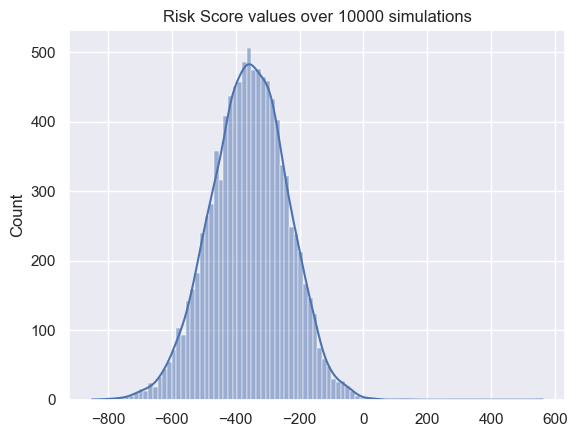

In [185]:
plt.title(f'Risk Score values over {sims.shape[1] - 1} simulations')
sns.histplot(sims.sum(axis=0).to_numpy(), kde=True)
plt.show()

In [32]:
# What is the max and min possible score?
# impr_type max = 1.252, impr_type min = 1
# comp_type max = 2.534, comp_type min = 2.304
# comp_list max = 90, comp
# option: max = 6, min = 1

# Equation
# risk_score = (comp_type[i] * (comp_list[i]/option))  - (improv_type[i] * (improv_list[i]/option))
# risk_score = (comp_type_weight*comp_value - improv_type_weight*improv_value)/option)

# To maximize:
6**34


286511799958070431838109696

In [11]:
age_bin_df = pd.DataFrame()
age_bin_df['Age'] = pat_res['age']
age_bin_df['Spinal Risk'] = spinal_risk_list
age_bins = [20, 30, 40, 50, 60, 70, 80,90, 100]

age_bin_df['Age Bin'] = pd.cut(age_bin_df['Age'], bins=age_bins)
average_scores = age_bin_df.groupby('Age Bin')['Spinal Risk'].mean()

In [12]:
average_scores

Age Bin
(20, 30]    -501.868354
(30, 40]    -441.394539
(40, 50]    -356.099414
(50, 60]    -375.046628
(60, 70]    -332.592820
(70, 80]    -301.488374
(80, 90]    -284.058122
(90, 100]           NaN
Name: Spinal Risk, dtype: float64

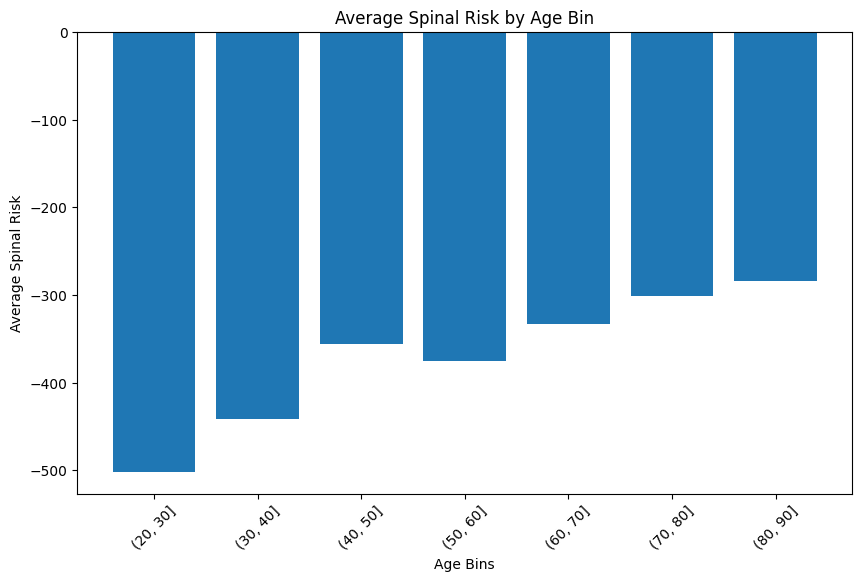

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(average_scores.index.astype(str), average_scores)
plt.xlabel('Age Bins')
plt.ylabel('Average Spinal Risk')
plt.title('Average Spinal Risk by Age Bin')
plt.xticks(rotation=45)
# plt.ylim(440, 520) 
plt.show()